<center> <h1>PREDICIÓN DEL SUEÑO ÁRBOLES DE DECISIÓN</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este  notebook se lleva a cabo la construcción de un clasificador de árboles de decisión de salida binaria a para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador árboles de decisión binario
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statistics as stats
from sklearn.model_selection import GridSearchCV
from random import sample
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error

## 1. ÁRBOLES DE DECISIÓN BINARIO

En este clasificador, se ha utilizado el algoritmo árboles de decisión para clasificar la vigilia o sueño ligero del sueño profundo. Es decir, se ha construido un clasificador de árboles con salida binaria: 0 y 1.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_bin= pd.read_csv('Train_binary.csv')
Test_bin= pd.read_csv('Test_binary.csv')
X_train_bin=Train_bin.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_bin=Train_bin['Etiquetas binarias']

X_test_bin=Test_bin.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_bin=Test_bin['Etiquetas binarias']

### 1.2  Creación del modelo y selección parámetros libres

In [4]:
clf= tree.DecisionTreeClassifier()
modelo_base=clf.fit(X_train_bin,y_train_bin)

In [5]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 1.3  Búsqueda de parámetros con validación cruzada

A continuación, se realiza la búsqueda de parámetros. Los parámetros escogidos son: **máxima profundidad** y **minimo número de muestras en cada nodo**, que constituyen una parte del total de parámetros libres conﬁgurables en los árboles de decisión y que permiten controlar de manera intuitiva el nivel de overﬁtting del modelo, y además obtener gráﬁcas de validación interpretables visualmente. Para ambos parámetros se realiza un barrido de los posibles valores escogidos para elegir aquel que maximice la exactitud (accuracy).

In [7]:
max_depth=range(1,30)
min_samples_leaf=range(10,100)

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
tree_grid = GridSearchCV(clf, param_grid=param, scoring= 'accuracy', iid=True,cv=5, n_jobs=-1)
tree_grid.fit(X_train_bin,y_train_bin)
best_parameters = tree_grid.best_params_

C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [8]:
# Clasificador con los mejores parámetros
tree_clf=tree_grid.best_estimator_

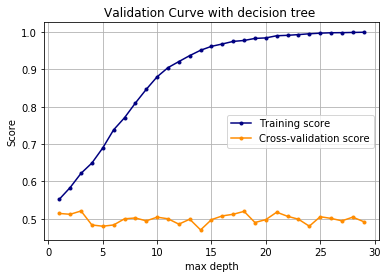

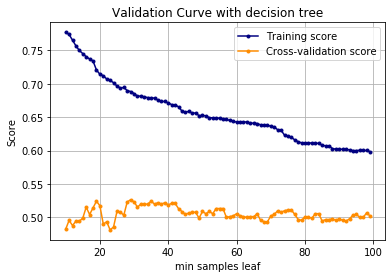

In [9]:
#max depth
train_scores1, test_scores1 = validation_curve(clf, X_train_bin, y_train_bin, param_name="max_depth", param_range=max_depth, cv=5, scoring="accuracy")
train_scores_mean1 = np.mean(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)
plt.title("Validation Curve with decision tree ")
plt.xlabel('max depth')
plt.ylabel("Score")

plt.plot(max_depth, train_scores_mean1, label="Training score",color="navy",marker='.')
plt.plot(max_depth, test_scores_mean1, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()

#min samples leaf
train_scores2, test_scores2 = validation_curve(clf, X_train_bin, y_train_bin, param_name="min_samples_leaf", param_range=min_samples_leaf,cv=5, scoring="accuracy")
train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)

plt.title("Validation Curve with decision tree")
plt.xlabel('min samples leaf')
plt.ylabel("Score")

plt.plot(min_samples_leaf, train_scores_mean2, label="Training score",color="navy",marker='.')
plt.plot(min_samples_leaf, test_scores_mean2, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>


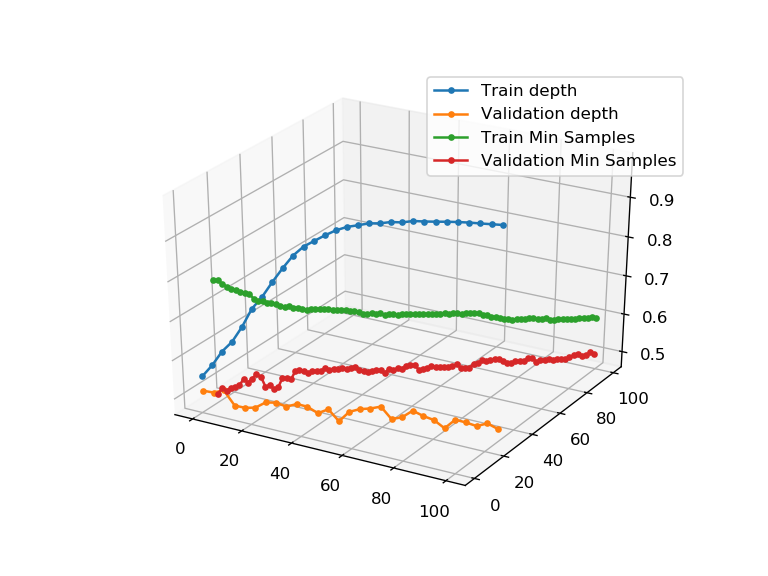

In [27]:
%matplotlib notebook
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')
z1=np.linspace(0,100,29)
z2=np.linspace(0,100,90)



ax.plot(z1,max_depth,train_scores_mean1, marker='.', label='Train depth')
ax.plot(z1, max_depth,test_scores_mean1, marker='.', label='Validation depth')
ax.plot(z2,min_samples_leaf,train_scores_mean2, marker='.', label='Train Min Samples')
ax.plot(z2,min_samples_leaf,test_scores_mean2, marker='.', label='Validation Min Samples')

ax.legend()

plt.show()

In [11]:
print('Los parámetros seleccionados por la función GridSearch son:',best_parameters)

Los parámetros seleccionados por la función GridSearch son: {'max_depth': 3, 'min_samples_leaf': 58}


In [21]:
print("Tasa de acierto del modelo base:",modelo_base.score(X_test_bin,y_test_bin))
print("Tasa de acierto con la busqueda de parámetros:",tree_clf.score(X_test_bin,y_test_bin))

#Mejora
print('Mejora  del {:0.2f}%.'.format( 100 * (tree_clf.score(X_test_bin,y_test_bin) - modelo_base.score(X_test_bin,y_test_bin)) / modelo_base.score(X_test_bin,y_test_bin)))

Tasa de acierto del modelo base: 0.4691780821917808
Tasa de acierto con la busqueda de parámetros: 0.5342465753424658
Mejora  del 13.87%.


### 1.4 Evaluación del modelo

In [22]:
predict = tree_clf.predict(X_test_bin)

acc_test= tree_clf.score(X_test_bin, y_test_bin).round(4)
acc_train= tree_clf.score(X_train_bin, y_train_bin).round(4)
print('La exactitud para el modelo de árboles de decisión en el conjunto de TEST es:', acc_test,'\n')
print('La exactitud para el modelo de árboles de decisión en el conjunto de TRAIN es:', acc_train,'\n')

print("Confusion Matrix")
print(confusion_matrix(y_test_bin, predict),'\n')
print("================Classification Report=================")
print(classification_report(y_test_bin, predict))

La exactitud para el modelo de árboles de decisión en el conjunto de TEST es: 0.5342 

La exactitud para el modelo de árboles de decisión en el conjunto de TRAIN es: 0.6002 

Confusion Matrix
[[ 56  93]
 [ 43 100]] 

================Classification Report=================
              precision    recall  f1-score   support

         0.0       0.57      0.38      0.45       149
         1.0       0.52      0.70      0.60       143

    accuracy                           0.53       292
   macro avg       0.54      0.54      0.52       292
weighted avg       0.54      0.53      0.52       292



In [23]:
matriz_confusion=pd.crosstab(y_test_bin,predict, rownames=['Clase predicha'], colnames=['Resultado del clasificador'])

In [24]:
matriz_confusion

Resultado del clasificador,0.0,1.0
Clase predicha,,
0.0,56,93
1.0,43,100


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

<IPython.core.display.Javascript object>


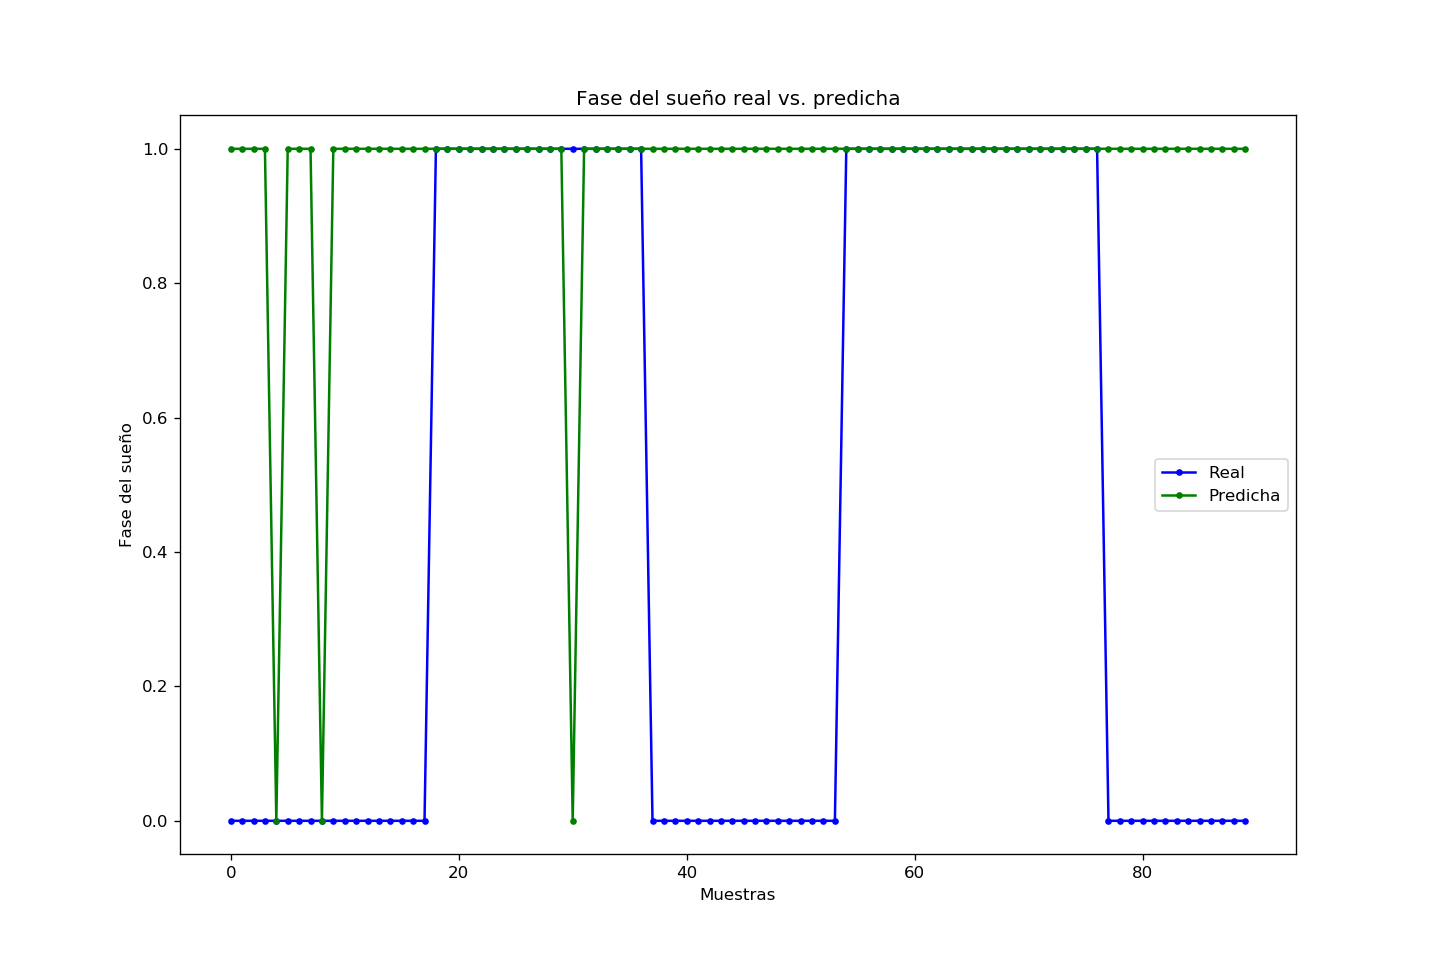

In [25]:
plt.figure(figsize=(12,8))
plt.plot(y_test_bin[0:90],color='blue', marker='.',label='Real')
plt.plot(predict[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

<IPython.core.display.Javascript object>


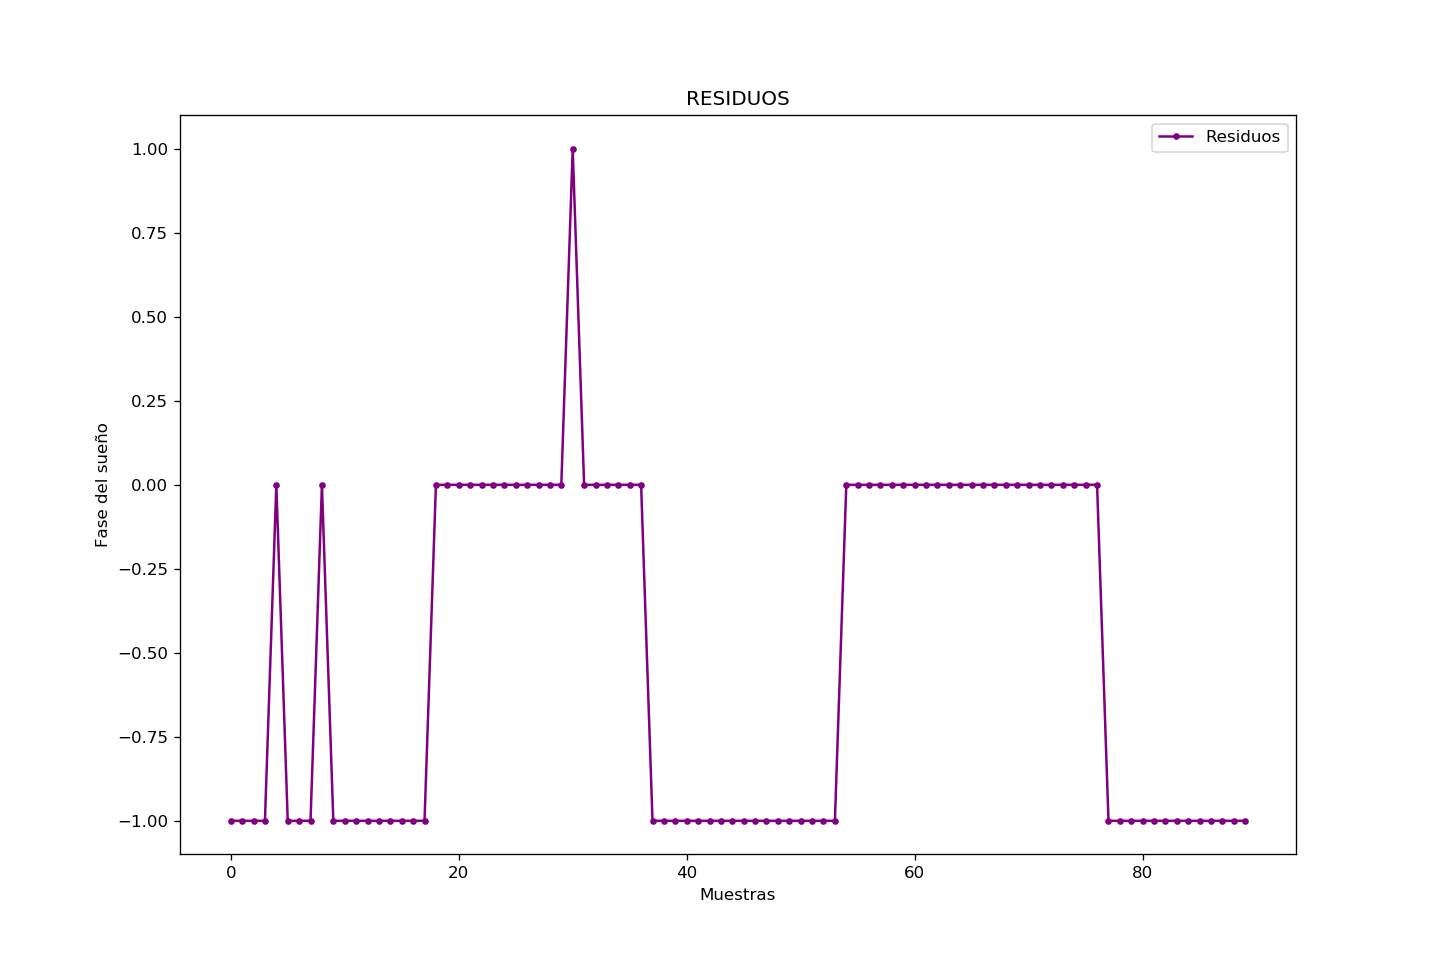

In [26]:
residuos= y_test_bin - predict
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()